<a href="https://colab.research.google.com/github/jungeun919/Keras_study/blob/main/Hands-On/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST

In [ ]:
import sklearn
import numpy as np
import os

In [ ]:
# MNIST dataset 다운로드 (사이킷런에서 제공)
# 사이킷런에서 읽어들인 dataset은 일반적으로 딕셔너리 구조를 가지고 있음
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
# 배열 살펴보기
X, y = mnist["data"], mnist["target"]
X.shape # image: 70000개, 특성: 784개 (28 * 28 픽셀)

(70000, 784)

In [ ]:
y.shape # y의 모양 확인

(70000,)

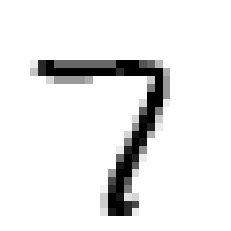

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[84] # 샘플 사진 가져오기 (index 84번째 사진)
some_digit_image = some_digit.reshape(28, 28) # 샘플의 특성을 추출해서 28*28 배열의 크기로 변경
plt.imshow(some_digit_image, cmap="binary") # 이미지 출력
plt.axis("off")
plt.show()

In [ ]:
# reshape 전 shape 확인 (784,)
some_digit.shape

(784,)

In [ ]:
# reshape 후 shape 확인 (28, 28)
some_digit_image.shape

(28, 28)

In [ ]:
# 실제 레이블 확인 (string)
y[84]

'7'

In [ ]:
# y를 정수로 변환
y = y.astype(np.uint8) # unsigned int 8 byte

In [ ]:
# 훈련세트: 60000개, 테스트세트: 10000개로 나눔
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 이진 분류기 훈련

In [ ]:
# '5-감지기'와 '5-아님' 두 개의 클래스를 구분할 수 있는 이진 분류기의 예시
y_train_5 = (y_train == 5) # 5는 True, 나머지는 False
y_test_5 = (y_test == 5)

# '7-감지기'와 '7-아님' 두 개의 클래스를 구분할 수 있는 이진 분류기의 예시
y_train_7 = (y_train == 7) # 7은 True, 나머지는 False
y_test_7 = (y_test == 7)

In [ ]:
# 사이킷런의 SGDClassifier 클래스를 사용해 확률적 경사 하강법 분류기로 시작
# -> 큰 dataset을 효율적으로 처리
# -> 한 번에 하나씩 훈련 샘플을 독립적으로 처리
from sklearn.linear_model import SGDClassifier

sgd_clf_5 = SGDClassifier(random_state=42)
sgd_clf_5.fit(X_train, y_train_5) # 모델 훈련 (5감지)

sgd_clf_7 = SGDClassifier(random_state=42)
sgd_clf_7.fit(X_train, y_train_7) # 모델 훈련 (7감지)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# index 84번째 사진의 레이블은 7(!= 5) 이므로 False
sgd_clf_5.predict([some_digit])

array([False])

In [ ]:
# index 84번째 사진의 레이블은 7(!= 7) 이므로 True
sgd_clf_7.predict([some_digit])

array([ True])

# 성능 측정

In [ ]:
# SGDClassifier 모댈 평가
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf_5, X_train, y_train_5, cv=3, scoring="accuracy") # 3개의 폴드로 나눔, 평가기준: 정확도
# -> 결과: 모든 교차 검증 폴더에 대해 정확도 95% 이상

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
# 숫자 5: True
# 숫자 5 아님: False
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool) # all False

In [ ]:
# 오차 행렬 (분류기의 성능 평가 방법)
# cross_val_predict 함수를 이용하여 실제 타깃과 비교할 수 있도록 예측값을 만듦
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf_5, X_train, y_train_5, cv=3)

In [ ]:
# confusion_matrix 함수를 통해 오차 행렬 준비
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred) # 타깃 클래스와 예측 클래스를 넣고 호출
# -> 결과: 오차행렬의 행은 실제 클래스, 열은 예측한 클래스를 나타냄

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
y_train_perfect_predictions = y_train_5 # 100% 예측 (완벽한 분류기일 경우)
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [ ]:
# 사이킷런에서 분류기의 지표를 계산하는 여러 함수를 제공
# 정밀도와 재현율 계산
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) # 정밀도 계산 (TP / (TP + FP)), (TP / predicted P)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred) # 재현율 계산 (TP / (TP + FN)), (TP / real P)

0.6511713705958311

In [ ]:
# F1 score (정밀도와 재현율의 조화 평균) 계산
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [ ]:
# decision_function() 메서드를 통해 각 샘플의 점수를 얻음
# some_digit[84] = 7
y_scores = sgd_clf_5.decision_function([some_digit])
y_scores

array([-12371.89046646])

In [ ]:
y_scores = sgd_clf_7.decision_function([some_digit])
y_scores

array([6542.47292185])

In [ ]:
# 임곗값이 0이므로 predict() 메서드와 같은 결과 반환
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [ ]:
# 임곗값 변경
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred
# -> 결과: False (임계값을 높이면 재현율이 줄어든다는 것을 볼 수 있음)

array([False])

In [ ]:
# 적절한 임계값 찾기
# cross_val_predict() 함수를 통해 훈련 세트에 있는 모든 샘플의 점수를 구함
# 결정 점수를 반환하도록 지정
y_scores = cross_val_predict(sgd_clf_5, X_train, y_train_5, cv=3,
                             method="decision_function")

In [ ]:
# 가능한 모든 임계값에 대해 정밀도와 재현율을 계산
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

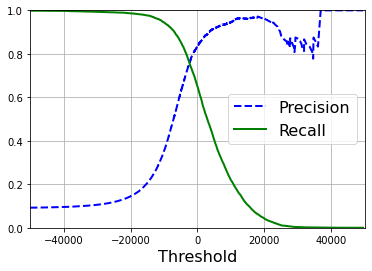

In [ ]:
# 임계값의 함수로 정밀도와 재현율을 그림으로 표현
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2) # b--: blue 실선
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2) # g-: green 직선
    plt.legend(loc="center right", fontsize=16) # 범례 추가
    plt.xlabel("Threshold", fontsize=16) # x축 이름 추가
    plt.grid(True) # 그리드 추가
    plt.axis([-50000, 50000, 0, 1])

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()
# -> 그림 결과: 임계값을 올리더라도 정밀도가 낮아질수도 있기 때문에 정밀도 (Precision) 결과가 더 울퉁불퉁함
# 재현율은 임계값이 올라감에 따라 줄어들 수 밖에 없기 때문에 부드러운 곡선이 됨

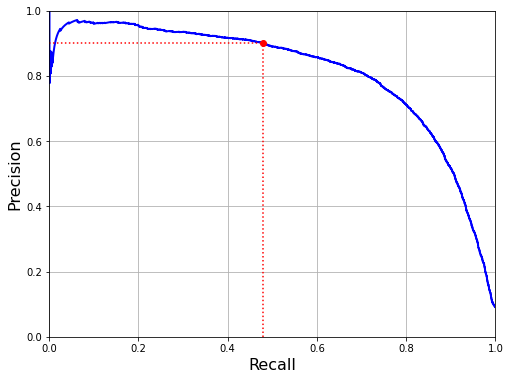

In [ ]:
# 재현율에 대한 정밀도 곡선 그림
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16) # x축 이름 추가
    plt.ylabel("Precision", fontsize=16) # y축 이름 추가
    plt.axis([0, 1, 0, 1])
    plt.grid(True) # 그리드 추가

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [ ]:
# 최소한 90% 정밀도가 되는 가장 낮은 임계값을 찾을 수 있음
# np.argmax()는 최댓값의 첫 번째 인덱스를 반환
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [ ]:
# 훈련 세트에 대한 예측 만듦
y_train_pred_90 = (y_scores >= threshold_90_precision)
# 예측에 대한 정밀도 확인
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [ ]:
# 예측에 대한 재현율 확인
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [ ]:
# ROC 곡선: 이진 분류에서 사용하는 도구
# ROC 곡선을 그리기 위해 roc_curve 함수를 사용
from sklearn.metrics import roc_curve

# TPR(진짜 양성 비율), FPR(거짓 양성 비율) 계산
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

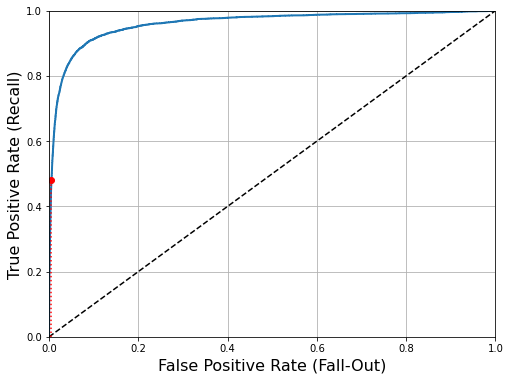

In [ ]:
# matplotlib을 사용해 TPR에 대한 FPR 곡선 그래프를 그림
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # 대각 점선
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # x축 이름 추가
    plt.ylabel('True Positive Rate (Recall)', fontsize=16) # y축 이름 추가
    plt.grid(True) # 그리드 추가

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.show()
# 왼쪽 모서리를 찍을수록 좋은 커브라고 할 수 있음

In [ ]:
# 곡선 아래의 면적 (AUC) 측정
# 완벽한 분류기: AUC = 1
# 랜덤 분류기: AUC = 0.5
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [ ]:
# RandomForestClassifier를 훈련시켜 SGDClassifier의 ROC곡선, AUC 점수 비교
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
# predict_proba: 샘플이 행, 클래스가 열이고 샘플이 주어진 클래스에 속할 확률을 담은 배열을 반환

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # 양성 클래스에 대한 확률을 점수로 사용
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest) # roc_curve() 함수는 레이블과 점수를 기대 (점수 대신 클래스의 확률 전달 가능)

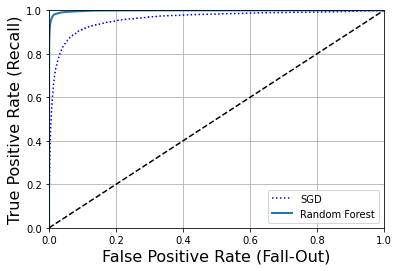

In [ ]:
# ROC 곡선 그리기
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()
# -> 결과: Random Forest 분류기가 SGD 분류기보다 좋음
# Random Forest의 ROC 곡선이 왼쪽 위 모서리에 더 가까워 AUC 값이 크기 때문

In [ ]:
# 정밀도와 재현율 점수 계산
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

# 다중 분류

In [ ]:
# 이진 분류 알고리즘을 선택하면 자동으로 OvR 또는 OvO를 실행
from sklearn.svm import SVC # 서포트 벡터 머신 분류기 테스트

svm_clf = SVC()
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train_5가 아닌 y_train을 사용
svm_clf.predict([some_digit])

array([7], dtype=uint8)

In [ ]:
# decision_function() 메서드를 호출하면 샘플당 10개의 점수 반환
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.76466364, -0.28778701,  6.18342938,  7.24737157,  4.79982101,
         3.91577837,  0.71996711,  9.30200604,  1.74730239,  8.27963448]])

In [ ]:
# 가장 높은 점수가 클래스 7에 해당하는 값
np.argmax(some_digit_scores)

7

In [ ]:
# 분류기가 훈련될 때 classes_ 속성에 타깃 클래스의 리스트를 값으로 정렬하여 저장
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
svm_clf.classes_[7] # classes_ 배열에 있는 각 클래스의 인덱스가 클래스 값 자체와 같음 (그러나 일반적으로는 드문 경우)

7

In [ ]:
# SVC 기반으로 OvR 전략을 사용하는 다중 분류기
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC()) # 이진 분류기 인스턴스를 만듦
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit]) # 예측값

array([7], dtype=uint8)

In [ ]:
# SGDClassifier를 훈련
sgd_clf_7.fit(X_train, y_train)
sgd_clf_7.predict([some_digit])

array([7], dtype=uint8)

In [ ]:
# decision_function() 메서드는 클래스마다 하나의 값을 반환
# SGD 분류기가 클래스마다 부여한 점수 확인
sgd_clf_7.decision_function([some_digit])

array([[-44329.84787555, -56609.94749827, -14526.51540817,
         -2120.00150725, -19356.06406399, -14265.67545919,
        -40627.49532582,   3171.63108673,  -7574.61905841,
         -7347.33702224]])

In [ ]:
# SGDClassifier의 정확도 평가
# 분류기의 평가에는 일반적으로 교차 검증을 사용
cross_val_score(sgd_clf_7, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf_7, X_train_scaled, y_train, cv=3, scoring="accuracy")
# -> 결과: 모든 테스트 폴드에서 84% 이상의 정확도를 얻음

array([0.8983, 0.891 , 0.9018])

# 에러 분석

In [ ]:
y_train_pred = cross_val_predict(sgd_clf_7, X_train_scaled, y_train, cv=3) # 예측을 만듦
conf_mx = confusion_matrix(y_train, y_train_pred) # confusion_matrix 함수를 통해 오차 행렬 준비
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

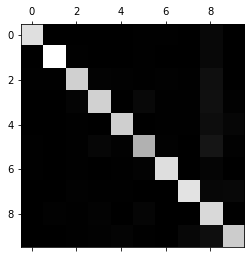

In [ ]:
# matplotlib을 사용해 이미지로 표현
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums # 오차 행렬의 각 값에 대응되는 클래스의 이미지 개수로 나누어 에러 비율을 비교

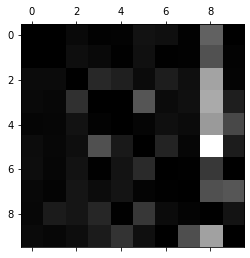

In [ ]:
# 다른 항목은 유지, 주대각선만 0으로 채워서 그래프를 그림
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray) # 이미지로 표현
plt.show()

In [ ]:
# 출력 함수 정의
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

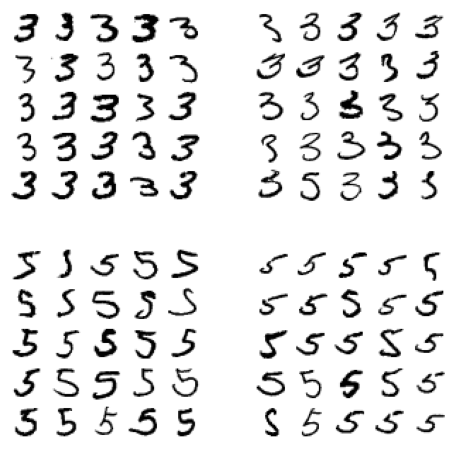

In [ ]:
cl_a, cl_b = 3, 5 # 3과 5의 샘플 그리기
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

# plot_digits(): matplotlib의 imshow() 함수를 사용하는 함수
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()